In [1]:
include("OQS_Tools_v1.jl")
using LinearAlgebra, Plots, PolyChaos
using .OQS_Tools_v1

function evolve_corrs(C0, H, dt, tmax, N)
    n = 2N + 1
    Cs = Vector{Array{ComplexF64}}(undef, 0)
    times = collect(0:dt:tmax)
    C0 = Matrix(C0)
    H = Matrix(H)

    for t in times
        U = exp(-im * t * H)
        C = U * C0 * U'
        push!(Cs, C)
    end

    return Cs
end



evolve_corrs (generic function with 1 method)

In [13]:
N = 100
dt = 0.1
tmax = 100.0
Esys = 0.0
sys = N+1
g = 0.01
sys_occ = 0.0

E = zeros(N)
hs = 0.5 * ones(N)

hs[1] = g
h = [reverse(hs); hs]

H = make_H_matrix(E, E, hs, hs, Esys, N, sys)
C0 = prepare_correlations(N,sys,sys_occ)
Cs = evolve_corrs(C0, H, dt, tmax, N)


1001-element Vector{Array{ComplexF64}}:
 [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im]
 [1.0 + 0.0im 0.0 + 2.1510158371355397e-19im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 2.1510158371355397e-19im 0.9999999999999998 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im]
 [1.0000000000000002 + 0.0im 0.0 + 4.479324446681061e-18im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 4.479324446681061e-18im 1.0000000000000004 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im]
 [0.9999999999999998 + 0.0im 0.0 + 6.266316183401521e-17im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 6.266316183401521e-17im 0.9999999999999999 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im

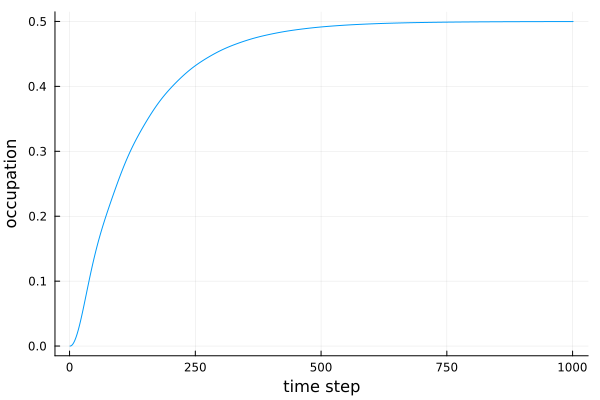

In [3]:
nsys = [real(C[sys,sys]) for C in Cs]
p = plot(nsys, xlabel="time step", ylabel="occupation",label="")
display(p)

In [4]:
anim = @animate for (t,C) in enumerate(Cs)
    flux = imag.(diag(C, 1)) .* 2 .* h
    p = plot(-N+0.5:1:N-0.5, flux, title="Time = $(round(dt*(t-1),digits=1))", 
        xlabel="inter-site",ylabel="flux",ylims=(0.0,0.1))
    end
gif(anim, "/Users/ben/AgeingManyBodyQuantumSys/Ben Code/figures/flux_M.gif", fps=20)


[out#0/gif @ 0x150612a90] Error opening output /Users/ben/AgeingManyBodyQuantumSys/Ben Code/figures/flux_M.gif: No such file or directory
Error opening output file /Users/ben/AgeingManyBodyQuantumSys/Ben Code/figures/flux_M.gif.
Error opening output files: No such file or directory


ProcessFailedException: failed process: Process(setenv(`/Users/ben/.julia/artifacts/f2987c3a1ab356c43faf29b7553d12607412099f/bin/ffmpeg -v 16 -framerate 20 -i /var/folders/zg/q6mr3xkx51b_9pk8wws0rb980000gn/T/jl_ISP5pb/%06d.png -i /var/folders/zg/q6mr3xkx51b_9pk8wws0rb980000gn/T/jl_ISP5pb/palette.bmp -lavfi paletteuse=dither=sierra2_4a -loop 0 -y '/Users/ben/AgeingManyBodyQuantumSys/Ben Code/figures/flux_M.gif'`,["XPC_FLAGS=0x0", "PATH=/Users/ben/.julia/artifacts/1994697285dfe8747ff7ec6927666edc88750202/bin:/Users/ben/.julia/artifacts/ccab86a3f5c2e11b743d3c30a624a3a95c3dc170/bin:/Users/ben/.julia/artifacts/093d6407945e0c42a70ddb9d4336920afc0047a3/bin:/Users/ben/.julia/artifacts/886df745cefeb82992e03223358349fb95adde15/bin:/Users/ben/.julia/artifacts/ebbb9485b8a2f32f9ab907b08b38b039acaae6cf/bin:/Users/ben/.julia/artifacts/adceccf0eff256e82867d94d0cfbb9dcc786e7a9/bin:/Users/ben/.julia/artifacts/946f83a35722fcae46f1f49c71466ba14dc17fd1/bin:/Users/ben/.julia/artifacts/c70ffd15b6adfc269b041a77ed26af364f9969c4/bin:/Users/ben/.julia/artifacts/88260b87e6cea70ad09d51bedb1ed022e3fa04fe/bin:/Users/ben/.julia/artifacts/f2987c3a1ab356c43faf29b7553d12607412099f/bin:/Users/ben/.antigravity/antigravity/bin:/Users/ben/.juliaup/bin:/Users/ben/miniforge3/bin:/Users/ben/miniforge3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin", "ELECTRON_RUN_AS_NODE=1", "VSCODE_CODE_CACHE_PATH=/Users/ben/Library/Application Support/Code/CachedData/bf9252a2fb45be6893dd8870c0bf37e2e1766d61", "XPC_SERVICE_NAME=application.com.microsoft.VSCode.15182359.15182365", "VSCODE_NLS_CONFIG={\"userLocale\":\"en-gb\",\"osLocale\":\"en-gb\",\"resolvedLanguage\":\"en\",\"defaultMessagesFile\":\"/Applications/Visual Studio Code.app/Contents/Resources/app/out/nls.messages.json\",\"locale\":\"en-gb\",\"availableLanguages\":{}}", "CONDA_PYTHON_EXE=/Users/ben/miniforge3/bin/python", "DYLD_FALLBACK_LIBRARY_PATH=/Users/ben/.julia/artifacts/c1600fa286afe4bf3616780a19b65285c63968ca/lib:/Users/ben/.julia/juliaup/julia-1.11.7+0.aarch64.apple.darwin14/lib/julia:/Users/ben/.julia/artifacts/365365262519d2f165f6ca9bdc0f104718889a88/lib:/Users/ben/.julia/artifacts/1994697285dfe8747ff7ec6927666edc88750202/lib:/Users/ben/.julia/artifacts/b820a0a437e8501d06a17439abd84feaa5b6cca3/lib:/Users/ben/.julia/artifacts/ccab86a3f5c2e11b743d3c30a624a3a95c3dc170/lib:/Users/ben/.julia/artifacts/a313d7c1b6344b380ad5425226ece4d3952012c3/lib:/Users/ben/.julia/artifacts/aba513720044071723bd6f80811b631b99eb4424/lib:/Users/ben/.julia/artifacts/21209a2ac399ce693d73daf1aa8d670fbc84d70f/lib:/Users/ben/.julia/artifacts/c59059ef20910985e15a497e3f3f9f5a01df2645/lib:/Users/ben/.julia/artifacts/8bf858c8be04703e4d2b7beb8e4d5c396b63328d/lib:/Users/ben/.julia/artifacts/093d6407945e0c42a70ddb9d4336920afc0047a3/lib:/Users/ben/.julia/artifacts/886df745cefeb82992e03223358349fb95adde15/lib:/Users/ben/.julia/artifacts/9afa0c7d7942a5f55d570fe7a49075105ace80b0/lib:/Users/ben/.julia/artifacts/c5d5b7c7e77b04af2eabde40ebbf379932d8bfd7/lib:/Users/ben/.julia/artifacts/7fefc9739781f053e15aeb2e61c2ba767c275222/lib:/Users/ben/.julia/artifacts/8df2529d47c744e5f9991ca2838d3d3031be5ce4/lib:/Users/ben/.julia/artifacts/98553abcb30b9dd3d08a0eb5db9d80db3fa4d47d/lib:/Users/ben/.julia/artifacts/ebbb9485b8a2f32f9ab907b08b38b039acaae6cf/lib:/Users/ben/.julia/artifacts/b3ac9a674d35c322d3739673265d95e54938f516/lib:/Users/ben/.julia/artifacts/a3e5b0f98e80defaec4ba488a9ceeace69feb32c/lib:/Users/ben/.julia/artifacts/adceccf0eff256e82867d94d0cfbb9dcc786e7a9/lib:/Users/ben/.julia/artifacts/946f83a35722fcae46f1f49c71466ba14dc17fd1/lib:/Users/ben/.julia/artifacts/c70ffd15b6adfc269b041a77ed26af364f9969c4/lib:/Users/ben/.julia/artifacts/88260b87e6cea70ad09d51bedb1ed022e3fa04fe/lib:/Users/ben/.julia/artifacts/ab9383a824148af6327107975ae00b323e81fe2e/lib:/Users/ben/.julia/artifacts/f2987c3a1ab356c43faf29b7553d12607412099f/lib:/Users/ben/.julia/juliaup/julia-1.11.7+0.aarch64.apple.darwin14/bin/../lib/julia:/Users/ben/.julia/juliaup/julia-1.11.7+0.aarch64.apple.darwin14/bin/../lib:/Users/ben/.julia/artifacts/c1600fa286afe4bf3616780a19b65285c63968ca/lib:/Users/ben/.julia/juliaup/julia-1.11.7+0.aarch64.apple.darwin14/lib/julia:/Users/ben/.julia/artifacts/b820a0a437e8501d06a17439abd84feaa5b6cca3/lib:/Users/ben/.julia/artifacts/ccab86a3f5c2e11b743d3c30a624a3a95c3dc170/lib:/Users/ben/.julia/artifacts/a313d7c1b6344b380ad5425226ece4d3952012c3/lib:/Users/ben/.julia/artifacts/aba513720044071723bd6f80811b631b99eb4424/lib:/Users/ben/.julia/artifacts/21209a2ac399ce693d73daf1aa8d670fbc84d70f/lib:/Users/ben/.julia/artifacts/c59059ef20910985e15a497e3f3f9f5a01df2645/lib:/Users/ben/.julia/artifacts/8bf858c8be04703e4d2b7beb8e4d5c396b63328d/lib:/Users/ben/.julia/artifacts/365365262519d2f165f6ca9bdc0f104718889a88/lib:/Users/ben/.julia/artifacts/093d6407945e0c42a70ddb9d4336920afc0047a3/lib:/Users/ben/.julia/artifacts/886df745cefeb82992e03223358349fb95adde15/lib:/Users/ben/.julia/artifacts/9afa0c7d7942a5f55d570fe7a49075105ace80b0/lib:/Users/ben/.julia/artifacts/1994697285dfe8747ff7ec6927666edc88750202/lib:/Users/ben/.julia/artifacts/c5d5b7c7e77b04af2eabde40ebbf379932d8bfd7/lib:/Users/ben/.julia/artifacts/7fefc9739781f053e15aeb2e61c2ba767c275222/lib:/Users/ben/.julia/artifacts/8df2529d47c744e5f9991ca2838d3d3031be5ce4/lib:/Users/ben/.julia/artifacts/98553abcb30b9dd3d08a0eb5db9d80db3fa4d47d/lib:/Users/ben/.julia/artifacts/ebbb9485b8a2f32f9ab907b08b38b039acaae6cf/lib:/Users/ben/.julia/artifacts/b3ac9a674d35c322d3739673265d95e54938f516/lib:/Users/ben/.julia/artifacts/a3e5b0f98e80defaec4ba488a9ceeace69feb32c/lib:/Users/ben/.julia/artifacts/adceccf0eff256e82867d94d0cfbb9dcc786e7a9/lib:/Users/ben/.julia/artifacts/946f83a35722fcae46f1f49c71466ba14dc17fd1/lib:/Users/ben/.julia/artifacts/c70ffd15b6adfc269b041a77ed26af364f9969c4/lib:/Users/ben/.julia/artifacts/88260b87e6cea70ad09d51bedb1ed022e3fa04fe/lib:/Users/ben/.julia/artifacts/ab9383a824148af6327107975ae00b323e81fe2e/lib:/Users/ben/.julia/artifacts/f2987c3a1ab356c43faf29b7553d12607412099f/lib:/Users/ben/.julia/artifacts/7ead0a440ba045155db235bff6602a984f08a651/lib:/Users/ben/.julia/artifacts/bc9bb998f79011e5783b6a40010e5c6c86e4a186/lib:/Users/ben/.julia/artifacts/63d48e4aab8721470f588bdeb1e2b462ee3b6a68/lib:/Users/ben/.julia/artifacts/4ed6227ff66b34dcd65f011ad8b91bdf545ac4d8/lib:/Users/ben/.julia/artifacts/8da603395acfbdbef8c5de3b7223aeb9276ecbdb/lib:/Users/ben/.julia/artifacts/90aba84be27431afda9bb9fe1335b46353fe04a0/lib:/Users/ben/.julia/artifacts/4b3b2d79556cc3aef6e3d8a234649cc85b91bb87/lib:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtConcurrent.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtCore.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtDBus.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtGui.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtNetwork.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtOpenGL.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtOpenGLWidgets.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtPrintSupport.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtSql.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtTest.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtWidgets.framework/Versions/A:/Users/ben/.julia/artifacts/6bcb7e8e013c86b6470fceef87dd9152f7c00ac9/lib/QtXml.framework/Versions/A:/Users/ben/.julia/artifacts/9eb49f419af4a4c2c59cabfbcea58bf8015fcd3f/lib:/Users/ben/.julia/juliaup/julia-1.11.7+0.aarch64.apple.darwin14/bin/../lib/julia:/Users/ben/.julia/juliaup/julia-1.11.7+0.aarch64.apple.darwin14/bin/../lib:", "GKS_ENCODING=utf8", "__CF_USER_TEXT_ENCODING=0x1F5:0:2", "VSCODE_PID=67306", "__CFBundleIdentifier=com.microsoft.VSCode", "VSCODE_IPC_HOOK=/Users/ben/Library/Application Support/Code/1.10-main.sock", "GKS_USE_CAIRO_PNG=true", "GSETTINGS_SCHEMA_DIR=/Users/ben/miniforge3/share/glib-2.0/schemas", "LOGNAME=ben", "SHLVL=0", "APPLICATION_INSIGHTS_NO_STATSBEAT=true", "OLDPWD=/", "SSH_AUTH_SOCK=/private/tmp/com.apple.launchd.PdYvBesSwn/Listeners", "FONTCONFIG_FILE=/Users/ben/.julia/artifacts/886df745cefeb82992e03223358349fb95adde15/etc/fonts/fonts.conf", "VSCODE_ESM_ENTRYPOINT=vs/workbench/api/node/extensionHostProcess", "_=/Applications/Visual Studio Code.app/Contents/MacOS/Electron", "CONDA_DEFAULT_ENV=base", "OPENBLAS_DEFAULT_NUM_THREADS=1", "GKS_FILEPATH=/var/folders/zg/q6mr3xkx51b_9pk8wws0rb980000gn/T/jl_kd2xSDC9a5.svg", "USER=ben", "VSCODE_CRASH_REPORTER_PROCESS_TYPE=extensionHost", "JULIA_NUM_THREADS=4", "GKSwstype=svg", "VSCODE_CWD=/", "VSCODE_L10N_BUNDLE_LOCATION=", "COMMAND_MODE=unix2003", "CONDA_PROMPT_MODIFIER=(base) ", "PWD=/", "VSCODE_HANDLES_UNCAUGHT_ERRORS=true", "GRDIR=/Users/ben/.julia/artifacts/9eb49f419af4a4c2c59cabfbcea58bf8015fcd3f", "SHELL=/bin/zsh", "XML_CATALOG_FILES=file:///Users/ben/miniforge3/etc/xml/catalog file:///etc/xml/catalog", "GKS_FONTPATH=/Users/ben/.julia/artifacts/9eb49f419af4a4c2c59cabfbcea58bf8015fcd3f", "TMPDIR=/var/folders/zg/q6mr3xkx51b_9pk8wws0rb980000gn/T/", "ORIGINAL_XDG_CURRENT_DESKTOP=undefined", "FONTCONFIG_PATH=/Users/ben/.julia/artifacts/886df745cefeb82992e03223358349fb95adde15/etc/fonts", "CONDA_PREFIX=/Users/ben/miniforge3", "MallocNanoZone=0", "CONDA_SHLVL=1", "CONDA_EXE=/Users/ben/miniforge3/bin/conda", "HOME=/Users/ben", "OPENBLAS_MAIN_FREE=1"]), ProcessExited(254)) [254]


In [5]:
function trace_distance(A, B, n, N) #1st matrix, 2nd matrix, chain sites included, chain sites
    Ma = A[N+1-n:N+1+n,N+1-n:N+1+n]
    Mb = B[N+1-n:N+1+n,N+1-n:N+1+n]
    D = 0.5 * tr(Ma .- Mb)
    return D
end

function block_entropy(C, n, N)
    Csub = C[N+1-n:N+1+n,N+1-n:N+1+n]
    Id = Matrix(1.0I, 2n+1, 2n+1)
    evals1 = eigvals(Csub)
    evals2 = eigvals(Id .- Csub)
    clamp!(evals1, 1e-16, 1e4)
    clamp!(evals2, 1e-16, 1e4)
    S = -sum(evals1 .* log.(evals1) .+ evals2 .* log.(evals2))
    return S
end

block_entropy (generic function with 1 method)

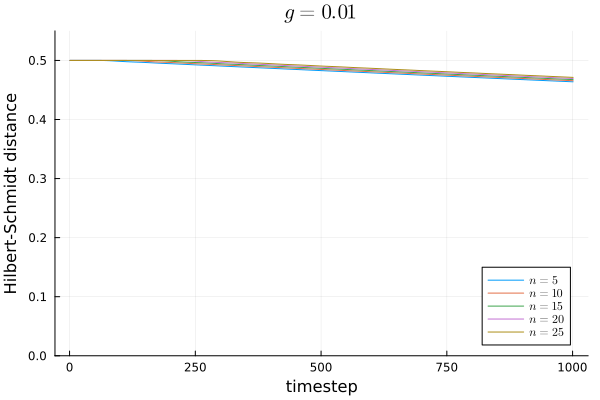

In [15]:
C0_full = prepare_correlations(N,sys,1.0)
C0_empty = prepare_correlations(N,sys,0.0)

Cs_full = evolve_corrs(C0_full, H, dt, tmax, N)
Cs_empty = evolve_corrs(C0_empty, H, dt, tmax, N)
len = length(Cs_full)

p = plot(xlabel="timestep",ylabel="Hilbert-Schmidt distance",title="\$ g=$g \$",yrange=(0.0,0.55))
for n in 5:5:25
    D = [trace_distance(Cs_full[t], Cs_empty[t], n, N) for t in 1:len]
    plot!(p, real.(D),label="\$ n=$n \$")
end
display(p)


n=10
n=30
n=50


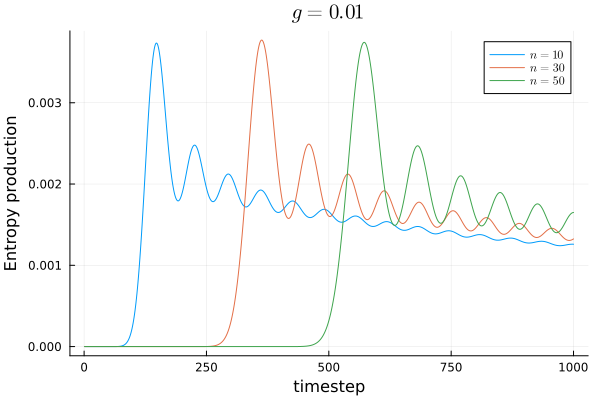

In [16]:

p = plot(xlabel="timestep",ylabel="Entropy production",title="\$ g=$g \$")
for n in 10:20:50
    S = [block_entropy(Cs_empty[t], n, N) for t in 1:len]
    S_f = S[2:end]
    S_i = S[1:end-1]
    sigma = (S_f - S_i)/dt
    println("n=$n")
    plot!(p, real.(sigma), label="\$ n=$n \$")
end
display(p)
